In [29]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [30]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


No null value is found in the dataset.  However, the columns of glucose / bloodpressure and skin thickness seems to have some problem of value 0 which is not realistic.

Medium / Mean value of that age can be used.

In [33]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

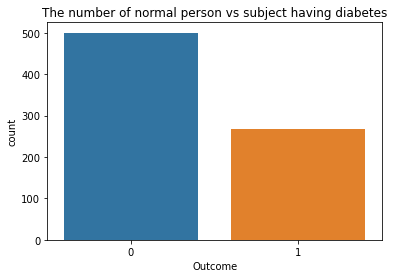

In [34]:
sns.countplot(data=df, x='Outcome')
plt.title('The number of normal person vs subject having diabetes')
plt.show()

# Explorartory Data Analysis and Feature Engineering

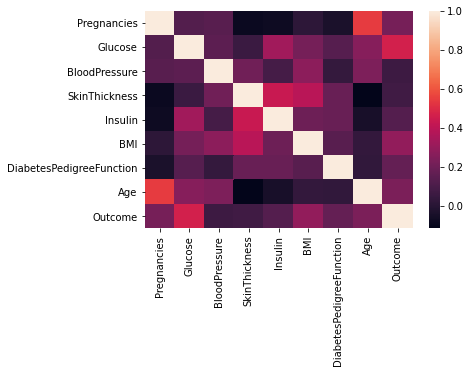

In [35]:
sns.heatmap(df.corr())
plt.show()

Pregnancies

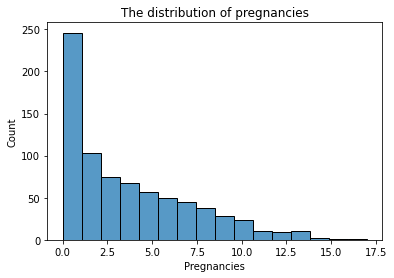

In [36]:
sns.histplot(df, x='Pregnancies')
plt.title("The distribution of pregnancies")
plt.show()

Although the data have some value 0 problem, that's is impossible to distinguish the true 0 and false 0 in this case.

Therefore, no extra work is required.

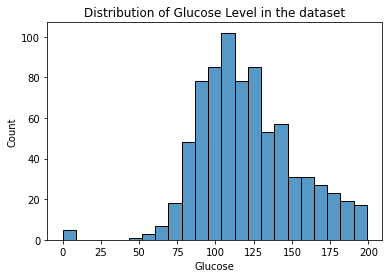

In [37]:
sns.histplot(df, x='Glucose')
plt.title('Distribution of Glucose Level in the dataset')
plt.show()

Some people have 0 blood pressure which is impossible.  Some work has to be done to cleanse the data.


The mean of that age is used to fill up the zero value.

In [38]:
df['Glucose'] = df[['Glucose','Age']].apply(lambda x: df[df['Age']==x['Age']]['Glucose'].mean() if x['Glucose'] == 0 else x['Glucose'],axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180,32.9,0.171,63,0
764,2,122.0,70,27,0,36.8,0.340,27,0
765,5,121.0,72,23,112,26.2,0.245,30,0
766,1,126.0,60,0,0,30.1,0.349,47,1


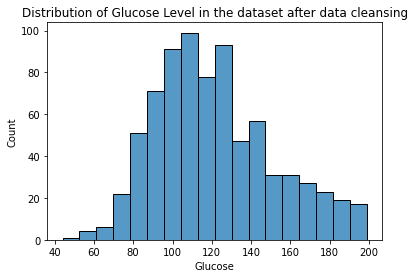

In [39]:
sns.histplot(df, x='Glucose')
plt.title('Distribution of Glucose Level in the dataset after data cleansing')
plt.show()

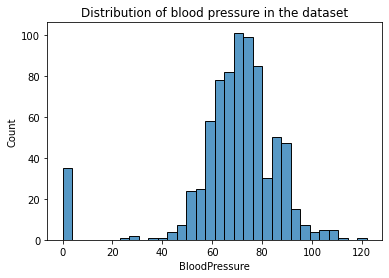

In [40]:
sns.histplot(df, x='BloodPressure')
plt.title('Distribution of blood pressure in the dataset')
plt.show()

The reading of blood presuree less than 40 is considered as outliner.  Therefore, the average value of the respective age will be used to clease the patient data whose blood pressure is less than 40.

In [41]:
df['BloodPressure'] = df[['BloodPressure','Age']].apply(lambda x: df[df['Age']==x['Age']]['BloodPressure'].mean() if x['BloodPressure'] <40 else x['BloodPressure'],axis=1)
df['BloodPressure'] = df['BloodPressure'].apply(lambda x: df['BloodPressure'].mean() if x == 0 else x)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50,1
1,1,85.0,66.0,29,0,26.6,0.351,31,0
2,8,183.0,64.0,0,0,23.3,0.672,32,1
3,1,89.0,66.0,23,94,28.1,0.167,21,0
4,0,137.0,40.0,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180,32.9,0.171,63,0
764,2,122.0,70.0,27,0,36.8,0.340,27,0
765,5,121.0,72.0,23,112,26.2,0.245,30,0
766,1,126.0,60.0,0,0,30.1,0.349,47,1


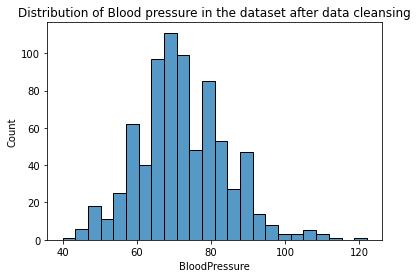

In [42]:
sns.histplot(df, x='BloodPressure')
plt.title('Distribution of Blood pressure in the dataset after data cleansing')
plt.show()

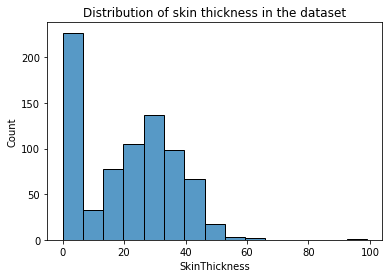

In [43]:
sns.histplot(df, x='SkinThickness')
plt.title('Distribution of skin thickness in the dataset')
plt.show()

Same apply to the skin thickness

In [44]:
df['SkinThickness'] = df[['SkinThickness','Age']].apply(lambda x: round(df[df['Age']==x['Age']]['SkinThickness'].mean()) if x['SkinThickness'] ==0 else x['SkinThickness'],axis=1)
df['SkinThickness'] = df['SkinThickness'].apply(lambda x: df['SkinThickness'].mean() if x == 0 else x)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,18.0,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180,32.9,0.171,63,0
764,2,122.0,70.0,27.0,0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112,26.2,0.245,30,0
766,1,126.0,60.0,14.0,0,30.1,0.349,47,1


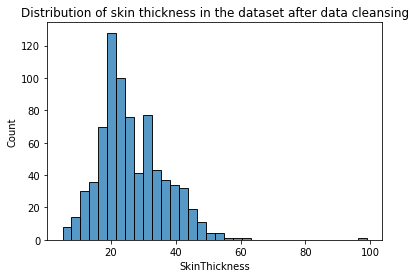

In [45]:
sns.histplot(df, x='SkinThickness')
plt.title('Distribution of skin thickness in the dataset after data cleansing')
plt.show()

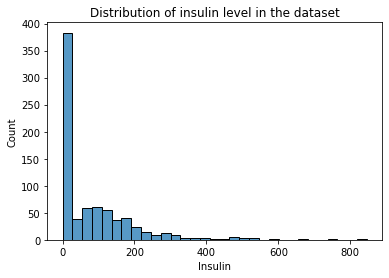

In [46]:
sns.histplot(df, x='Insulin')
plt.title('Distribution of insulin level in the dataset')
plt.show()

Same data cleasing work is applied

In [47]:
df['Insulin'] = df[['Insulin','Age']].apply(lambda x: round(df[df['Age']==x['Age']]['Insulin'].mean()) if x['Insulin'] ==0 else x['Insulin'],axis=1)
df['Insulin'] = df['Insulin'].apply(lambda x: df['Insulin'].mean() if x == 0 else x)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,26.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,111.0,26.6,0.351,31,0
2,8,183.0,64.0,18.0,36.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,63.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,14.0,49.0,30.1,0.349,47,1


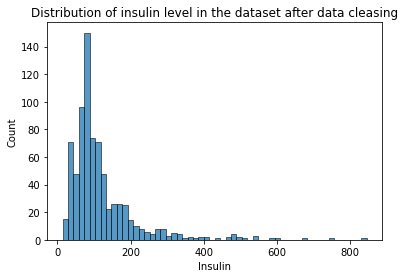

In [48]:
sns.histplot(df, x='Insulin')
plt.title('Distribution of insulin level in the dataset after data cleasing')
plt.show()

# Machine Learning

In [49]:
from sklearn.model_selection import train_test_split
X = df.drop(columns='Outcome')
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.3, random_state=42)

In [50]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

In [51]:
svc = SVC()
log = LogisticRegression()
RF = RandomForestClassifier(n_estimators=100)
KN = KNeighborsClassifier(n_neighbors = 10)
DT = DecisionTreeClassifier()

model_dict = {
    'SVC':svc,
    'Logistic Regression' :log,
    'Random Forest': RF,
    'KNeighbor': KN,
    'DecisionTree':DT,
}


In [52]:
result_list = []
for model_name, model in model_dict.items():
    print('Training Model:', model_name)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = round(accuracy_score(y_test, y_pred)*100,2)
    print('The score:', score)
    result_list.append([model_name, score])
    

Training Model: SVC
The score: 74.89
Training Model: Logistic Regression
The score: 74.03
Training Model: Random Forest
The score: 74.46
Training Model: KNeighbor
The score: 70.56
Training Model: DecisionTree
The score: 74.03


Different models were used for training.

In [53]:
yhats = [model.predict(X_test) for model in list(model_dict.values())]
yhats = np.array(yhats).T
from scipy import stats
y_pred = stats.mode(yhats,axis=1 ).mode

score = round(accuracy_score(y_test, y_pred)*100,2)
result_list.append(['Average', score])

An average model is also applied to increase the accuracy

In [54]:
result_df = pd.DataFrame(result_list,columns=['Model','Result'])
result_df

,Model,Result
0,SVC,74.89
1,Logistic Regression,74.03
2,Random Forest,74.46
3,KNeighbor,70.56
4,DecisionTree,74.03
5,Average,75.32


In [55]:
X = df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']

In [56]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [57]:
classifier = svm.SVC(kernel='linear')

In [58]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [59]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [60]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7719869706840391


In [61]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [62]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7792207792207793


Making a Predictive System

In [63]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


In [64]:
import pickle
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))


In [65]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [67]:
for column in X.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
